In [1]:
# load data
import pandas as pd
data = pd.read_csv('reservations_(5).csv')

In [2]:
# size of the data frame
data.shape

(6376, 2)

In [3]:
data.head()

,vehicle_id,reservation_type
0,208,1
1,601,3
2,993,1
3,423,2
4,685,3


In [4]:
'''Actually, I don't need to do this because I already know one transaction by one row.'''

data['reservation_type'].count()

6376

In [5]:
# check if have missing values
data.isnull().sum()

vehicle_id          0
reservation_type    0
dtype: int64

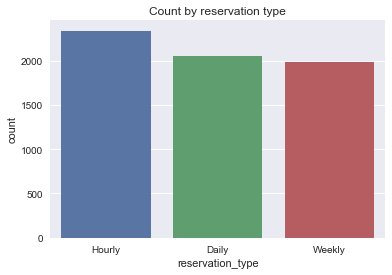

In [6]:
'''
Overview of the distribution and check if data has the outlier in reservation_type values.
I can't tell an actual point of view in here since I don't know what standard to classify the type,
such as 10 days, it should be classified into daily or weekly?
'''

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(x='reservation_type', data=data)
ind = np.arange(3)
plt.xticks(ind, ('Hourly', 'Daily', 'Weekly'))
sns.plt.title('Count by reservation type')

In [7]:
'''
Counted the number of reservations group by type.
I will use them to combine with vehicles dataset for analyzation.
I also can preprocess data by SQL or excel,
but I will use python as a major language to complete this case.
'''

# count the number of reservation by hour
h = data[data['reservation_type'] == 1].groupby('vehicle_id').size()
h = pd.Series(h, name='n_hourly')
h = h.reset_index()
h.head()

,vehicle_id,n_hourly
0,1,1
1,2,4
2,3,1
3,4,1
4,6,4


In [8]:
# count the number of reservation by day
d = data[data['reservation_type'] == 2].groupby('vehicle_id').size()
d = pd.Series(d, name='n_daily')
d = d.reset_index()
d.head()

,vehicle_id,n_daily
0,2,3
1,3,9
2,5,1
3,6,4
4,8,2


In [9]:
# count the number of reservation by week
w = data[data['reservation_type'] == 3].groupby('vehicle_id').size()
w = pd.Series(w, name='n_weekly')
w = w.reset_index()
w.head()

,vehicle_id,n_weekly
0,3,7
1,4,1
2,5,1
3,6,5
4,8,4


In [10]:
# count the number of total reservation
t = data.groupby('vehicle_id').size()
t = pd.Series(t, name='total_reservations')
t = t.reset_index()
t.head() 

,vehicle_id,total_reservations
0,1,1
1,2,7
2,3,17
3,4,2
4,5,2


In [11]:
'''
pd.merge only can combine two tables at once,
I shall find a better way to combine multiple tables in the future.
'''

res = pd.merge(h, d, on='vehicle_id', how='outer')
res = pd.merge(res, w, on='vehicle_id', how='outer')
res = pd.merge(res, t, on='vehicle_id', how='outer')
res.head()

,vehicle_id,n_hourly,n_daily,n_weekly,total_reservations
0,1,1.0,NaN,NaN,1
1,2,4.0,3.0,NaN,7
2,3,1.0,9.0,7.0,17
3,4,1.0,NaN,1.0,2
4,6,4.0,4.0,5.0,13


In [12]:
# Debug, make sure it is full join, should have miss values in the dataset.
res.isnull().sum()

vehicle_id              0
n_hourly              150
n_daily               151
n_weekly              150
total_reservations      0
dtype: int64

In [13]:
'''
Will generate a column of the index in new dataset since it is data frame format.
I will drop this column and convert NaN value to 0
when I join reservations dataset into vehicle dataset.
'''

res.to_csv('reservations.csv')